In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import  LogisticRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv")

In [3]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [4]:
df.tail()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN
999,456,60,556080,11-11-1996,OH,250/500,1000,766.19,0,612260,...,?,5060,460,920,3680,Mercedes,E400,2007,N,NaN


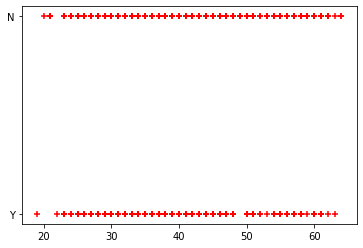

In [5]:
plt.scatter(df.age,df.fraud_reported,marker='+',color='red')

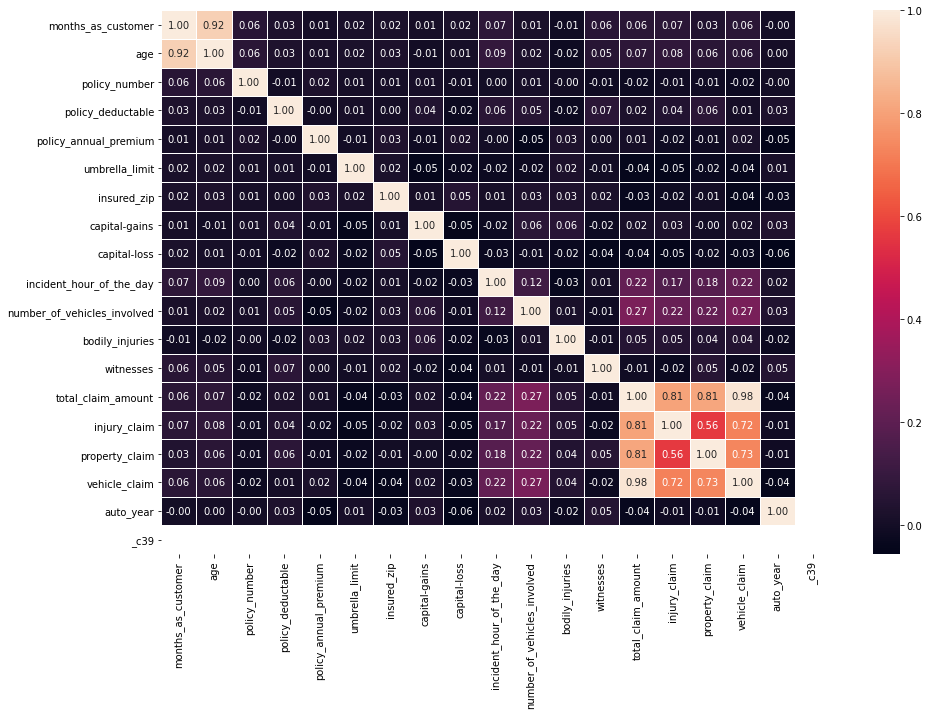

In [6]:
# Let's make our correlation matrix visual
corr_matrix=df.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,
               annot=True,
               linewidths=0.5,
               fmt=".2f"
              )

# Encoding 

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [8]:
dfle = df
dfle.fraud_reported = le.fit_transform(dfle.fraud_reported)
dfle

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,1,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,1,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,0,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,1,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,0,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,0,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,0,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,0,NaN


In [42]:
X = dfle[['fraud_reported','policy_number','auto_model']].values
X

array([[1, 521585, '92x'],
       [1, 342868, 'E400'],
       [0, 687698, 'RAM'],
       ...,
       [0, 918516, 'Impreza'],
       [0, 533940, 'A5'],
       [0, 556080, 'E400']], dtype=object)

In [45]:
y = dfle.auto_model
y

0          92x
1         E400
2          RAM
3        Tahoe
4          RSX
        ...   
995     Accord
996     Passat
997    Impreza
998         A5
999       E400
Name: auto_model, Length: 1000, dtype: object

In [46]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

In [47]:
X = ohe.fit_transform(X).toarray()
X

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [48]:
X = X[:,1:]
X

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [49]:
X_train, X_test, y_train, y_test=train_test_split(df[['fraud_reported']],df.age,test_size=0.1)

In [50]:
X_test

,fraud_reported
73,0
618,0
875,1
425,1
831,1
...,...
615,0
937,0
819,0
783,0


In [51]:
X_train

,fraud_reported
725,0
241,1
650,1
182,0
617,0
...,...
697,0
123,0
694,0
523,0


In [52]:
model = LogisticRegression()

In [53]:
model.fit(X_train,y_train)

LogisticRegression()

In [54]:
y_pred=model.predict(X_test)

In [55]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve,roc_auc_score
accuracy =accuracy_score(y_test,y_pred)
accuracy

0.05

In [56]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [57]:
model.predict(X_test)

array([43, 43, 41, 41, 41, 43, 41, 43, 43, 43, 43, 43, 43, 41, 41, 43, 43,
       43, 43, 43, 43, 43, 43, 43, 41, 43, 43, 41, 43, 41, 43, 43, 41, 43,
       43, 43, 41, 43, 41, 41, 43, 43, 43, 43, 43, 41, 43, 43, 41, 43, 43,
       43, 43, 41, 43, 43, 43, 41, 43, 41, 43, 43, 43, 43, 43, 43, 43, 43,
       41, 43, 43, 43, 41, 43, 43, 41, 43, 43, 43, 43, 43, 43, 43, 41, 43,
       43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43],
      dtype=int64)

In [58]:
model.score(X_test,y_test)

0.05

In [59]:
model.score(X_train,y_train)

0.05444444444444444

In [60]:
model.predict_proba(X_test)

array([[0.00091361, 0.00116309, 0.00501383, ..., 0.00443907, 0.00200262,
        0.00240555],
       [0.00091361, 0.00116309, 0.00501383, ..., 0.00443907, 0.00200262,
        0.00240555],
       [0.00170495, 0.0009496 , 0.00273392, ..., 0.00445896, 0.00287642,
        0.00166635],
       ...,
       [0.00091361, 0.00116309, 0.00501383, ..., 0.00443907, 0.00200262,
        0.00240555],
       [0.00091361, 0.00116309, 0.00501383, ..., 0.00443907, 0.00200262,
        0.00240555],
       [0.00091361, 0.00116309, 0.00501383, ..., 0.00443907, 0.00200262,
        0.00240555]])

In [61]:
y_pred=model.predict(X_test)

In [62]:
y_pred

array([43, 43, 41, 41, 41, 43, 41, 43, 43, 43, 43, 43, 43, 41, 41, 43, 43,
       43, 43, 43, 43, 43, 43, 43, 41, 43, 43, 41, 43, 41, 43, 43, 41, 43,
       43, 43, 41, 43, 41, 41, 43, 43, 43, 43, 43, 41, 43, 43, 41, 43, 43,
       43, 43, 41, 43, 43, 43, 41, 43, 41, 43, 43, 43, 43, 43, 43, 43, 43,
       41, 43, 43, 43, 41, 43, 43, 41, 43, 43, 43, 43, 43, 43, 43, 41, 43,
       43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43],
      dtype=int64)

In [63]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [64]:
y_pred = model.predict(X_test)

In [65]:
mean_absolute_error(y_test,y_pred)

8.53

In [66]:
mean_squared_error(y_test,y_pred)

105.77

In [67]:
np.sqrt(mean_squared_error(y_test,y_pred))

10.284454287904634

# Regularization

In [68]:
from sklearn.linear_model import Ridge,Lasso,RidgeCV, LassoCV

In [69]:
lasscv = LassoCV(alphas = None, max_iter = 1000, normalize = True) 
lasscv.fit (X_train, y_train)

LassoCV(normalize=True)

In [70]:
alpha = lasscv.alpha_
alpha

0.0023735511066684616

In [71]:
lasso_reg = Lasso(alpha)
lasso_reg.fit(X_train, y_train)

Lasso(alpha=0.0023735511066684616)

In [72]:
lasso_reg.score(X_test,y_test)

-0.005155086320556945

In [73]:
ridgecv = RidgeCV(alphas=np.arange(0.001,0.1,0.01),normalize =True)

ridgecv.fit(X_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [74]:
ridgecv.alpha_

0.09099999999999998